✅ TensorFlow version: 2.20.0
📂 MNIST dataset downloaded and saved in: ./data

🚀 Training MLP...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9062 - loss: 0.3316 - val_accuracy: 0.9517 - val_loss: 0.1585
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9603 - loss: 0.1332 - val_accuracy: 0.9652 - val_loss: 0.1132
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9725 - loss: 0.0918 - val_accuracy: 0.9689 - val_loss: 0.1006
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9780 - loss: 0.0716 - val_accuracy: 0.9721 - val_loss: 0.0898
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9823 - loss: 0.0570 - val_accuracy: 0.9764 - val_loss: 0.0816
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9862 - loss: 0.0457 - val_accuracy: 0.9773 - val_loss: 0.0742
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9884 - loss: 0.0377 - val_accuracy: 0.9763 - val_loss: 0.0816
Epoch

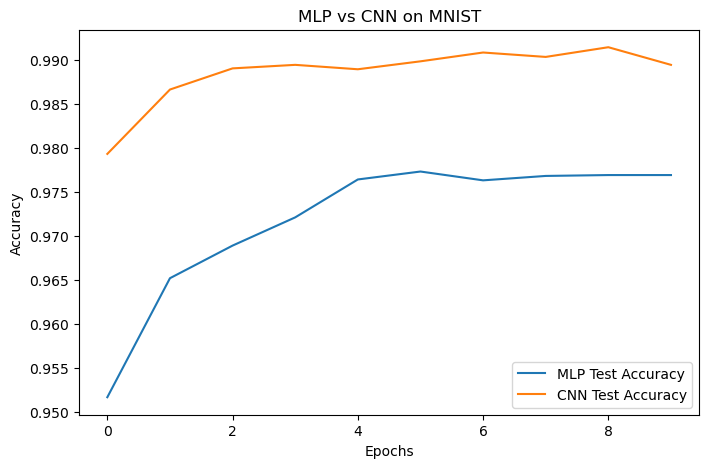


✅ Final MLP Test Accuracy: 97.69%
✅ Final CNN Test Accuracy: 98.94%
📂 Dataset saved in folder: C:\Users\Siddhant Gite\Untitled Folder\data


In [3]:
# ------------------------------------------------------------
# MNIST Neural Network Comparison (TensorFlow)
# ------------------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import numpy as np

print("✅ TensorFlow version:", tf.__version__)

# ------------------------------------------------------------
# Step 1: Load MNIST Dataset (Download to ./data)
# ------------------------------------------------------------
data_dir = "./data"
os.makedirs(data_dir, exist_ok=True)

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Save locally for offline use later
np.savez(os.path.join(data_dir, "mnist_data.npz"),
         X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
print(f"📂 MNIST dataset downloaded and saved in: {data_dir}")

# ------------------------------------------------------------
# Step 2: Normalize and Reshape
# ------------------------------------------------------------
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# For CNN input, add channel dimension (28, 28, 1)
X_train_cnn = np.expand_dims(X_train, -1)
X_test_cnn = np.expand_dims(X_test, -1)

# ------------------------------------------------------------
# Step 3: Define MLP Model
# ------------------------------------------------------------
def create_mlp():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ------------------------------------------------------------
# Step 4: Define CNN Model
# ------------------------------------------------------------
def create_cnn():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ------------------------------------------------------------
# Step 5: Train and Evaluate Models
# ------------------------------------------------------------
num_epochs = 10
batch_size = 128

# MLP
mlp = create_mlp()
print("\n🚀 Training MLP...")
mlp_history = mlp.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
                      validation_data=(X_test, y_test), verbose=1)

# CNN
cnn = create_cnn()
print("\n🚀 Training CNN...")
cnn_history = cnn.fit(X_train_cnn, y_train, epochs=num_epochs, batch_size=batch_size,
                      validation_data=(X_test_cnn, y_test), verbose=1)

# ------------------------------------------------------------
# Step 6: Plot Accuracy Comparison
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(mlp_history.history['val_accuracy'], label='MLP Test Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MLP vs CNN on MNIST")
plt.legend()
plt.show()

# ------------------------------------------------------------
# Step 7: Final Evaluation
# ------------------------------------------------------------
mlp_test_loss, mlp_test_acc = mlp.evaluate(X_test, y_test, verbose=0)
cnn_test_loss, cnn_test_acc = cnn.evaluate(X_test_cnn, y_test, verbose=0)

print(f"\n✅ Final MLP Test Accuracy: {mlp_test_acc:.2%}")
print(f"✅ Final CNN Test Accuracy: {cnn_test_acc:.2%}")
print(f"📂 Dataset saved in folder: {os.path.abspath(data_dir)}")
